In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [3]:
# https://drive.google.com/file/d/1kSh-oZTwKscRgNAHmgQYC38n0HvzYtlW/view?usp=share_link
! gdown 1kSh-oZTwKscRgNAHmgQYC38n0HvzYtlW

Downloading...
From: https://drive.google.com/uc?id=1kSh-oZTwKscRgNAHmgQYC38n0HvzYtlW
To: /content/Леденцы.dat
100% 7.81k/7.81k [00:00<00:00, 11.9MB/s]


# Задача 1
Одной из задач сегментации потребителей может быть классификация потребителей по потребностям. Такая сегментация в дальнейшем может помочь выявить, какие марки популярны среди представителей разных сегментов, а также, каким образом можно было бы модифицировать продукцию компании для удовлетворения потребностей привлекательного сегмента. С точки зрения маркетологов, сегменты должны быть интерпретируемыми, измеримыми и достаточно большими. Как правило, сегментация является частью крупного исследования. 

Набор данных содержит оценки степени согласия респондентов с высказываниями, отражающими цель потребления леденцов. Всего каждый респондент выставлял оценки по 11 высказываниям:
- V1: Я потребляю леденцы, чтобы освежить дыхание
- V2: Я потребляю леденцы, чтобы чувствовать себя увереннее
- V3: Я потребляю леденцы, чтобы освежить полость рта
- V4: Я потребляю леденцы, чтобы избавиться от неприятного вкуса во рту
- V5: Я потребляю леденцы как заменитель других кондитерских изделий
- V6: Я потребляю леденцы, когда мне хочется чего-нибудь сладкого
- V7: Леденцы помогают мне сконцентрироваться
- V8: Я потребляю леденцы, чтобы отвлечься на несколько минут и подумать
- V9: Я потребляю леденцы для того, чтобы облегчить боль в горле
- V10: Я потребляю леденцы для того, чтобы избавиться от заложенности носа
- V11: Я потребляю леденцы для улучшения самочувствия

# Вопросы.
- Определить число кластеров.
- Подобрать метод классификации, дающий наиболее ясные результаты.


In [6]:
df = pd.read_csv('/content/Леденцы.dat', sep=';')

# Для начала посмотрим на данные и описательную статистику

In [8]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,4,5,5,5,3,3,3,3,3,3,3
1,5,4,5,5,3,3,3,3,3,3,3
2,5,5,4,5,3,3,3,3,3,3,3
3,5,4,5,5,3,3,3,3,3,3,3
4,4,5,5,5,3,3,3,3,3,3,3


In [10]:
df.info() # пропусков нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   V1      338 non-null    int64
 1   V2      338 non-null    int64
 2   V3      338 non-null    int64
 3   V4      338 non-null    int64
 4   V5      338 non-null    int64
 5   V6      338 non-null    int64
 6   V7      338 non-null    int64
 7   V8      338 non-null    int64
 8   V9      338 non-null    int64
 9   V10     338 non-null    int64
 10  V11     338 non-null    int64
dtypes: int64(11)
memory usage: 29.2 KB


In [9]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
count,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000
mean,3.544379,3.526627,3.517751,3.411243,3.207101,3.204142,3.254438,3.289941,3.603550,3.550296,3.565089
std,0.955748,0.956410,0.990150,0.992311,0.867314,0.869725,0.844107,0.821784,0.969682,0.927082,0.942042
min,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,5.000000,5.000000,5.000000,4.000000,3.000000,3.000000,3.000000,3.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


**Исходя из минимальной и максимальной оценки, респондентам предлагалось выставлять суждениям от 2 до 5 баллов. Будем предполагать, что 2 балла - "не согласен", 5 баллов - "полностью согласен"**

# Данные находятся в одном диапазоне, стандартизация не требуется
Проведем первичный кластерный анализ, посмотрим на дендрограмму, чтобы выявить оптимальное число кластеров. В качестве расстояния между кластерами воспользуемся методом Уорда; в качестве расстояния между объектами используем Евклидово расстояние.

In [11]:
link = linkage(df, method='ward', metric='euclidean')

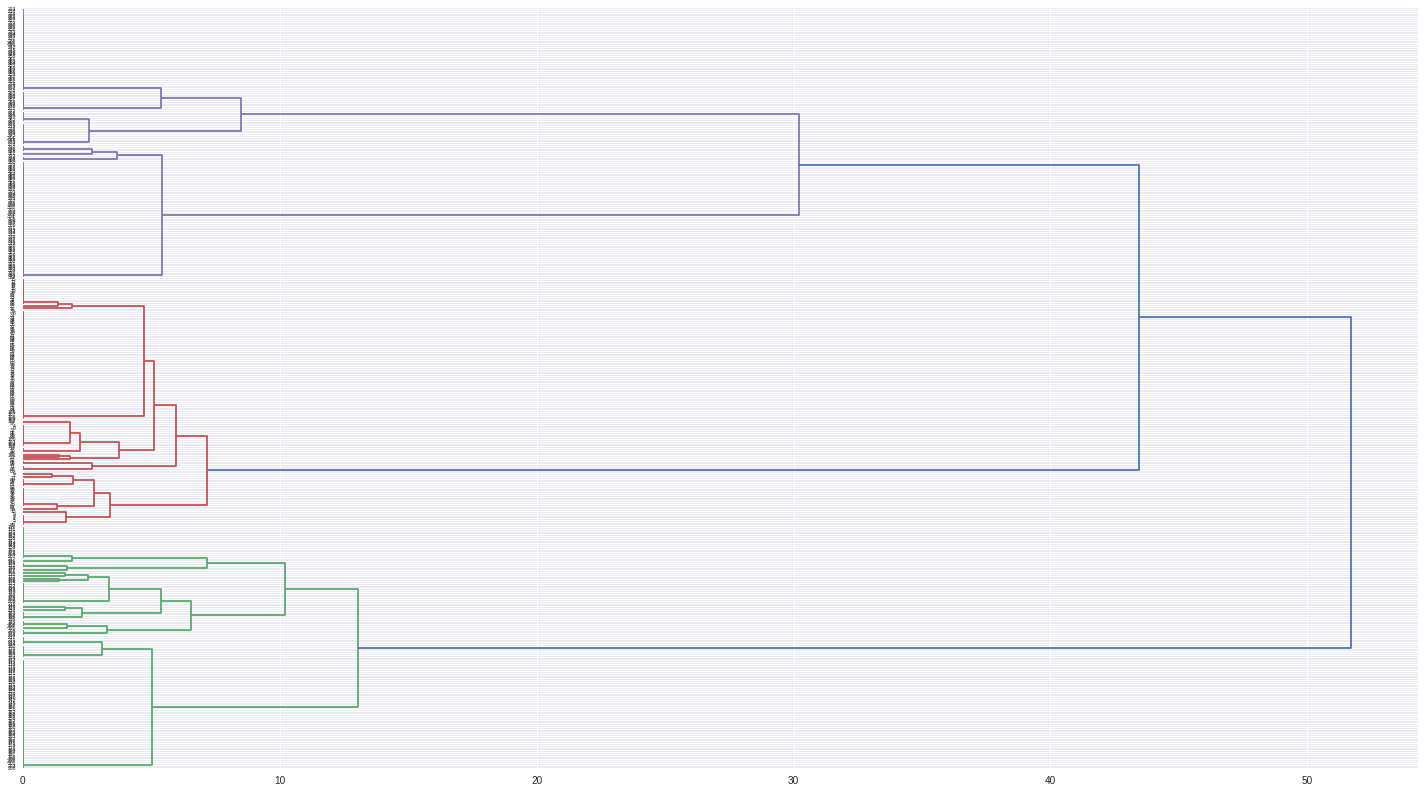

In [23]:
# смотрим на дендрограмму, чтобы отследить объединение кластеров
plt.figure(figsize=(25, 14))
matplotlib.style.use('seaborn')
dendrogram(link, orientation = "right")
plt.show()

**Получился слишком большой скачок расстояния для фиолетового кластера. Рассмотрим для начала 4 кластера, разделя фиолетовый на 2. Посмотрим, как можно интерпретировать результаты. Ограничим расстояние до 15**

In [16]:
df['cluster'] = fcluster(link, 15, criterion='distance')

In [18]:
df.groupby('cluster').size()

cluster
1    108
2    110
3     59
4     61
dtype: int64

In [21]:
df.groupby('cluster').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
cluster,,,,,,,,,,,
1,2.824074,2.833333,2.768519,2.620370,2.611111,2.583333,2.750000,2.916667,4.953704,4.814815,4.861111
2,4.845455,4.800000,4.836364,4.681818,3.036364,3.036364,3.000000,2.990909,3.072727,3.045455,3.045455
3,3.000000,2.966102,2.966102,2.915254,2.915254,2.949153,4.915254,4.915254,3.000000,3.000000,3.000000
4,3.000000,3.000000,3.000000,3.000000,4.852459,4.852459,3.000000,2.918033,2.754098,2.754098,2.754098


In [22]:
df.groupby('cluster').median()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
cluster,,,,,,,,,,,
1,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,5.0,5.0,5.0
2,5.0,5.0,5.0,5.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
3,3.0,3.0,3.0,3.0,3.0,3.0,5.0,5.0,3.0,3.0,3.0
4,3.0,3.0,3.0,3.0,5.0,5.0,3.0,3.0,3.0,3.0,3.0


# Интепретация результатов
Считаю, что 4 кластера оптимальны в данном примере. Есть четкая градация по целям и проблемам, которые решают респонденты, употребляя леденцы. В данном случае при анализе удобнее пользоваться скорее медианами, а не средним. Четко видна следующая тенденция:
- 1 кластер: употребляет леденцы из-за проблем со здоровьем: у них либо боль в горле, либо заложенность носа, либо они плохо себя чувствуют
- 2 кластер: у людей проблемы с запахом изо рта, неприятноное ощущение во рту. Скорее всего, неуверенные люди неуверены как раз из-за данной проблемы (но это не точно, причинно-следственную связь установить нельзя)
- 3 кластер: леденцы помогают людям сконцентрироваться, подумать
- 4 кластер: сладкоежки.

# Второй эксперимент
В качестве эксперимента можно рассмотреть более мелкие кластеры, ограничив максимальное расстояние между кластерами до 10. Тогда получим более узконаправленные 6 кластеров.

In [24]:
df['cluster_2'] = fcluster(link, 10, criterion='distance')

In [26]:
df.groupby('cluster_2').size()

cluster_2
1     59
2     29
3     20
4    110
5     59
6     61
dtype: int64

In [27]:
df.groupby('cluster_2').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,cluster
cluster_2,,,,,,,,,,,,
1,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.932203,4.830508,4.898305,1.0
2,2.482759,2.241379,2.000000,2.000000,2.241379,2.137931,2.758621,3.241379,4.965517,4.724138,4.758621,1.0
3,2.800000,3.200000,3.200000,2.400000,2.000000,2.000000,2.000000,2.200000,5.000000,4.900000,4.900000,1.0
4,4.845455,4.800000,4.836364,4.681818,3.036364,3.036364,3.000000,2.990909,3.072727,3.045455,3.045455,2.0
5,3.000000,2.966102,2.966102,2.915254,2.915254,2.949153,4.915254,4.915254,3.000000,3.000000,3.000000,3.0
6,3.000000,3.000000,3.000000,3.000000,4.852459,4.852459,3.000000,2.918033,2.754098,2.754098,2.754098,4.0


In [28]:
df.groupby('cluster_2').median()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,cluster
cluster_2,,,,,,,,,,,,
1,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,5.0,5.0,5.0,1.0
2,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,5.0,5.0,5.0,1.0
3,3.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,5.0,5.0,5.0,1.0
4,5.0,5.0,5.0,5.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0
5,3.0,3.0,3.0,3.0,3.0,3.0,5.0,5.0,3.0,3.0,3.0,3.0
6,3.0,3.0,3.0,3.0,5.0,5.0,3.0,3.0,3.0,3.0,3.0,4.0


**В данном случае эксперимент провалился, 1 кластер разделился на 3, при этом у людей общая проблема - проблема со здоровьем.**

# Выводы
4 кластера является оптимальным выбором в данной ситуации, охвачены все 11 пунктов, при этом пункты имееют общий смысловой контекст. Можно сделать гипотезы о том, что первый сегмент предпочитает лечебные леденцы, второй сегмент - освежающие леденцы, третий - нет идей, четвертый - скорее карамельки.

В дальнейем можно сравнивать группы и исследовать каждую отдельно для получения информации:
- какой сегмент тратит больше денег
- какой возраст, статус и т.д. у каждого сегмента
- какие леденцы какому сегменту больше нравятся (здесь можно рассмотреть компании, виды леденцов).

# Задача 2
Задача – провести кластерный анализ с целью обнаружения групп
кандидатов, близких по своим качествам.
Сравнить решения, полученные при разбиении на три и четыре кластера.


# Описание данных
18
претендентов прошли 10 различных тестов в кадровом отделе. Максимальная
оценка, которую можно было получить на каждом из тестов, составляет 10
баллов, минимальная - 1. Проверялись следующие качества:
1. Память на числа
2. Умение решать математические задачи
3. Находчивость при прямом диалоге
4. Умение составлять алгоритмы
5. Уверенность во время выступления
6. Командный дух
7. Находчивость
8. Сотрудничество
9. Признание в коллективе
10. Сила убеждения

In [33]:
# https://drive.google.com/file/d/156pIWPFH8JcqJoc9CI8OrHd0qqhluvQM/view?usp=share_link
! gdown 156pIWPFH8JcqJoc9CI8OrHd0qqhluvQM

Downloading...
From: https://drive.google.com/uc?id=156pIWPFH8JcqJoc9CI8OrHd0qqhluvQM
To: /content/assess.dat
100% 656/656 [00:00<00:00, 852kB/s]


In [50]:
df2 = pd.read_csv('/content/assess.dat', sep='\t', index_col='NAME')

In [51]:
# сразу удалим ненужный столбец с номером индекса
del df2['NR']

In [44]:
df2

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10
NAME,,,,,,,,,,
Volker,10,10,9,10,10,10,9,10,10,9
Sigrid,10,10,4,10,5,5,4,5,4,3
Elmar,5,4,10,5,10,4,10,5,3,10
Peter,10,10,9,10,10,10,9,10,10,9
Otto,4,3,5,4,3,10,4,10,10,5
Elke,10,10,4,10,5,4,3,4,5,5
Sarah,4,4,5,5,4,10,5,10,10,6
Peter,4,5,3,4,5,10,4,10,10,4
Gudrun,4,5,10,4,10,5,10,4,3,10


**На самом деле данных немного, некоторые кластеры видны на глаз. Стандартизация здесь также не нужна, так как все данные находятся в одном диапазоне**

**Для начала разобьем объекты на 3 кластера**

In [45]:
link_2 = linkage(df2, method='ward', metric='euclidean')

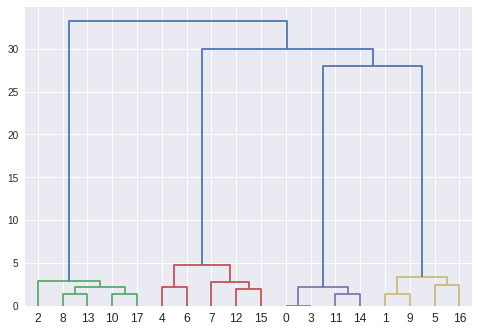

In [47]:
dendrogram(link_2)
plt.show()

**Четко видно 4 кластера или даже 5, но данных слишком мало, чтобы делить кластеры на более мелкие**

In [52]:
df2['cluster'] = fcluster(link_2, 3, criterion='maxclust')

In [54]:
df2.groupby('cluster').size()

cluster
1    5
2    5
3    8
dtype: int64

In [55]:
df2.groupby('cluster').mean()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10
cluster,,,,,,,,,,
1,4.2,4.8,10.000,4.4,10.000,4.4,10.0,4.0,3.800,10.000
2,4.8,4.4,4.000,4.0,4.200,10.0,4.4,10.0,10.000,5.000
3,10.0,10.0,6.625,10.0,7.375,7.0,6.5,7.0,7.125,6.875


## Интерпретация
- 1 кластер: люди с сильными коммуникативными функциями, умеют вести переговоры
- 2 кластер: командные игроки, лидеры
- 3 кластер: математики, при этом не с самыми плохими коммуникативными навыками

**Теперь поделим на 4 кластера и сравним результаты**

In [56]:
df2['cluster_2'] = fcluster(link_2, 4, criterion='maxclust')

In [57]:
df2.groupby('cluster_2').size() # группы поделились на более равномерные

cluster_2
1    5
2    5
3    4
4    4
dtype: int64

In [58]:
df2.groupby('cluster_2').mean()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,cluster
cluster_2,,,,,,,,,,,
1,4.2,4.8,10.00,4.4,10.00,4.4,10.00,4.00,3.80,10.00,1.0
2,4.8,4.4,4.00,4.0,4.20,10.0,4.40,10.00,10.00,5.00,2.0
3,10.0,10.0,9.00,10.0,10.00,9.5,9.25,9.75,10.00,9.50,3.0
4,10.0,10.0,4.25,10.0,4.75,4.5,3.75,4.25,4.25,4.25,3.0


## Интерпретация
- 1 кластер: люди с сильными коммуникативными функциями, умеют вести переговоры
- 2 кластер: командные игроки, лидеры
- 3 кластер: математикис с сильными навыками публичных выступлений, а также навыками общения и при этом лидеры. Идеальные кандидаты без слабых мест
- 4 кластер: математики без каких либо дополнительных талантов

**В данном случае я бы поделил претендентов на 4 кластера. В таком случае явно можно отследить кандидатов с сильными сторонами**